In [1]:
#firebase
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
#gensim
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gensim.downloader as api
import json
from gensim.models import KeyedVectors
from gensim.test.utils import common_texts
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import spacy
import time
from sklearn.metrics.pairwise import cosine_similarity
from gensim.similarities import WmdSimilarity
%matplotlib inline

/home/hugo/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:10: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(


In [2]:
df = pd.read_csv('skill2vec_50K.csv', sep=',', header=None)

/home/hugo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,951,952,953,954,955,956,957,958,959,960
0,125720,HR Executive,screening,selection,Interview,HR,Recruiter,IT Recruiter,Sourcing,recruitment executive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112708,Special Teacher,Teaching,Education,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115226,consulting,fresher,IT helpdesk,Techincal Troubleshooting,international voice,international BPO,technical support,outsourcing,call center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19805,diploma,machining,cnc m,mould,conventional machines,die making,knowledge,tool,cipet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80208,Compensation,Benefits,HR Functions,Alm,Payroll,ESS,Core HR,QC,QA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(0, 1)

In [5]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,951,952,953,954,955,956,957,958,959,960
0,HR Executive,screening,selection,Interview,HR,Recruiter,IT Recruiter,Sourcing,recruitment executive,onboarding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Special Teacher,Teaching,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,consulting,fresher,IT helpdesk,Techincal Troubleshooting,international voice,international BPO,technical support,outsourcing,call center,BBA fresher,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,diploma,machining,cnc m,mould,conventional machines,die making,knowledge,tool,cipet,assembly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Compensation,Benefits,HR Functions,Alm,Payroll,ESS,Core HR,QC,QA,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
skills = df.values.tolist()

In [7]:
cleanedList = [[str(x).lower() for x in y if str(x) != 'nan'] for y in skills]

In [8]:
cleanedList[30]

['mcom',
 'female',
 'hadapsar',
 'accounting',
 'bcom',
 'tally',
 'erp',
 'accounts assistant']

In [9]:
model = Word2Vec(cleanedList, vector_size=300, min_count=2, window=10, sg =1)

In [11]:
model.wv.most_similar('java', topn=50)

[('core java', 0.9092951416969299),
 ('maven', 0.847659707069397),
 ('design patterns', 0.845737636089325),
 ('eclipse ide', 0.8423232436180115),
 ('webservices', 0.8289898037910461),
 ('threading', 0.828010082244873),
 ('ant', 0.8274703621864319),
 ('technology lead', 0.8269569873809814),
 ('jboss', 0.8264576196670532),
 ('j2ee', 0.8248031735420227),
 ('tomcat', 0.823221743106842),
 ('eclipse', 0.8224032521247864),
 ('senior java', 0.8191211819648743),
 ('design pattern', 0.8188989162445068),
 ('web services', 0.8183192610740662),
 ('object oriented design', 0.816838800907135),
 ('soap', 0.8165345788002014),
 ('object oriented programming', 0.8164052367210388),
 ('databases', 0.8160533308982849),
 ('rest', 0.8158941864967346),
 ('struts', 0.8148943185806274),
 ('tech lead', 0.8138975501060486),
 ('application servers', 0.8136637806892395),
 ('servlets', 0.813496470451355),
 ('oracle application server', 0.8132999539375305),
 ('weblogic', 0.8089086413383484),
 ('orm', 0.808756589889526

In [12]:
instance = WmdSimilarity(cleanedList, model.wv, num_best=100)

In [13]:
start = time.time()
sims = instance['c++', 'java', 'javascript']
end = time.time()
print(end - start)

31.055898666381836


In [72]:
sims

[(38527, 0.7857781943686014),
 (9533, 0.7781667364230628),
 (41520, 0.7767845602512039),
 (40123, 0.7767845602512039),
 (38045, 0.7728830610104188),
 (9420, 0.7728830610104188),
 (9793, 0.7608041898980108),
 (5243, 0.7606314735843422),
 (37011, 0.7514850187106739),
 (23192, 0.7387785203563337),
 (21736, 0.7360078334842158),
 (39150, 0.7339062550705931),
 (3473, 0.7299027590758784),
 (17483, 0.7293255811745077),
 (21142, 0.7196527496165067),
 (48811, 0.718614678162896),
 (10545, 0.7168788969482693),
 (26869, 0.7168788969482693),
 (17946, 0.7168788969482693),
 (44778, 0.7168788969482693),
 (34741, 0.7168788969482693),
 (29318, 0.7168788969482693),
 (47898, 0.7156107803803037),
 (11440, 0.7135297632496628),
 (17918, 0.7130398039158721),
 (34993, 0.712253040590118),
 (38414, 0.7119465542299958),
 (38134, 0.7110370850626412),
 (27637, 0.7095727508099308),
 (13745, 0.7087373468001611),
 (29263, 0.7085752223579719),
 (13612, 0.7084272190311681),
 (19326, 0.7080251742619112),
 (31052, 0.707672

In [73]:
for sim in sims:
    print(cleanedList[sim[0]])

['android', 'java', 'c++']
['extjs', 'javascript', 'java']
['java', 'javascript', 'angular js']
['angular js', 'java', 'javascript']
['java', 'javascript']
['anjular js', 'anjular j script', 'java', 'javascript']
['java', 'javascript', 'selenium']
['javascript', 'jquery', 'java']
['c', 'c++', 'java']
['game developer', 'game scripts', 'c++', 'programming', 'java']
['jee', 'angularjs', 'java', 'javascript']
['web developer front end', 'full stack web developer', 'core java', 'java', 'javascript']
['j2ee', 'java', 'c', 'c++']
['front end', 'full stack engineer', 'java', 'javascript']
['xml', 'c', 'c++', 'java', 'soa', 'xslt']
['java', 'sql', 'javascript', 'perl']
['accounting', 'javascript', 'java']
['accounting', 'javascript', 'java']
['accounting', 'javascript', 'java']
['accounting', 'javascript', 'java']
['accounting', 'javascript', 'java']
['accounting', 'javascript', 'java']
['java developer', 'javascript', 'jquery', 'java']
['reactive programming', 'mobile product development', 'j

In [74]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.most_similar(word, topn=50)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(12,12))
    colors = cm.rainbow(np.linspace(0, 1, len(arr)))
    plt.scatter(x_coords, y_coords, c=colors)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

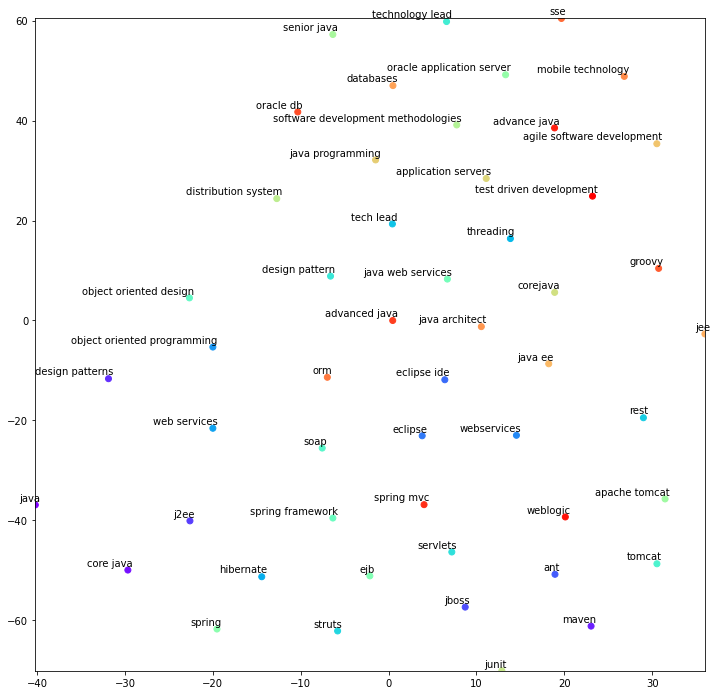

In [75]:
display_closestwords_tsnescatterplot(model, 'java')

In [12]:
#model.save("skills2vec.model")

In [81]:
#model = Word2Vec.load('skills2vec.model')

In [13]:
model.wv.most_similar('java', topn=50)

[('core java', 0.9072147011756897),
 ('design patterns', 0.8350512981414795),
 ('maven', 0.8305233716964722),
 ('eclipse ide', 0.8259491920471191),
 ('webservices', 0.815807580947876),
 ('jboss', 0.8149387240409851),
 ('databases', 0.81490159034729),
 ('j2ee', 0.8146723508834839),
 ('object oriented programming', 0.8134521842002869),
 ('technology lead', 0.8109585046768188),
 ('distribution system', 0.8100413084030151),
 ('web services', 0.8091688752174377),
 ('threading', 0.8089738488197327),
 ('soap', 0.8087803721427917),
 ('tomcat', 0.8081734776496887),
 ('eclipse', 0.8070707321166992),
 ('ant', 0.8061708211898804),
 ('rest', 0.8054284453392029),
 ('servlets', 0.803918719291687),
 ('senior java', 0.8028877973556519),
 ('design pattern', 0.802024781703949),
 ('relational database', 0.801519513130188),
 ('tech lead', 0.8008119463920593),
 ('struts', 0.8001078963279724),
 ('object oriented design', 0.7997957468032837),
 ('orm', 0.7976371049880981),
 ('groovy', 0.7957475781440735),
 ('s

In [46]:
info = api.info()
print(json.dumps(info, indent=4))

{
    "corpora": {
        "semeval-2016-2017-task3-subtaskBC": {
            "num_records": -1,
            "record_format": "dict",
            "file_size": 6344358,
            "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py",
            "license": "All files released for the task are free for general research use",
            "fields": {
                "2016-train": [
                    "..."
                ],
                "2016-dev": [
                    "..."
                ],
                "2017-test": [
                    "..."
                ],
                "2016-test": [
                    "..."
                ]
            },
            "description": "SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collect

In [55]:
def display_closestwords_tsnescatterplot_pre_trained(model, word, vector_size):
    
    arr = np.empty((0,vector_size), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.most_similar(word, topn=50)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.figure(figsize=(12,12))
    colors = cm.rainbow(np.linspace(0, 1, len(arr)))
    plt.scatter(x_coords, y_coords, c=colors)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [48]:
model_glove_twitter = api.load('glove-twitter-200')

In [49]:
model_glove_twitter.most_similar('java', topn=50)

[('developer', 0.6804163455963135),
 ('c++', 0.6445408463478088),
 ('javascript', 0.5837357640266418),
 ('sql', 0.5836789608001709),
 ('oracle', 0.565355122089386),
 ('software', 0.5506511926651001),
 ('sharepoint', 0.5197974443435669),
 ('windows', 0.519537627696991),
 ('server', 0.5184795260429382),
 ('html', 0.5169185996055603),
 ('developers', 0.5121346116065979),
 ('programmer', 0.5098596215248108),
 ('perl', 0.5055326819419861),
 ('python', 0.5017238855361938),
 ('linux', 0.5005338191986084),
 ('drupal', 0.49724119901657104),
 ('programming', 0.495327889919281),
 ('opera', 0.49470868706703186),
 ('engineer', 0.49306797981262207),
 ('web', 0.49071940779685974),
 ('mysql', 0.4872756898403168),
 ('css', 0.4848442077636719),
 ('php', 0.4831404983997345),
 ('ruby', 0.47958528995513916),
 ('android', 0.47563573718070984),
 ('wordpress', 0.47246748208999634),
 ('project', 0.4724123179912567),
 ('development', 0.47022196650505066),
 ('unix', 0.4698059856891632),
 ('database', 0.467433810

In [57]:
model_fast_text_wiki = api.load('fasttext-wiki-news-subwords-300')

[=-------------------------------------------------] 3.3% 31.7/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.1% 211.5/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.4% 243.9/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 86.5% 829.2/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.7% 898.4/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.5% 953.5/958.4MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [58]:
model_fast_text_wiki.most_similar('java', topn=100)

[('javac', 0.7275259494781494),
 ('Java', 0.7245972156524658),
 ('java.awt', 0.7166570425033569),
 ('java.io', 0.69063800573349),
 ('-jar', 0.6865713000297546),
 ('java.lang', 0.6818904876708984),
 ('java-based', 0.6728014945983887),
 ('.java', 0.6701676249504089),
 ('JAVA', 0.6595228910446167),
 ('javascript', 0.6536478996276855),
 ('javadoc', 0.6463393568992615),
 ('jav', 0.6415862441062927),
 ('javana', 0.635837972164154),
 ('rt.jar', 0.6305291652679443),
 ('javanese', 0.6268637180328369),
 ('libxml', 0.6207975149154663),
 ('java.net', 0.6200923919677734),
 ('non-Java', 0.6180813908576965),
 ('Javascript', 0.6180692315101624),
 ('java.sun.com', 0.6102710962295532),
 ('java.lang.Object', 0.6087606549263),
 ('PHP4', 0.6083014607429504),
 ('java.lang.String', 0.6081844568252563),
 ('libxslt', 0.606887936592102),
 ('java.security', 0.6049058437347412),
 ('JavaFX', 0.604634702205658),
 ('Java-based', 0.6036741137504578),
 ('libxml2', 0.6033440232276917),
 ('java.util', 0.6023485660552979

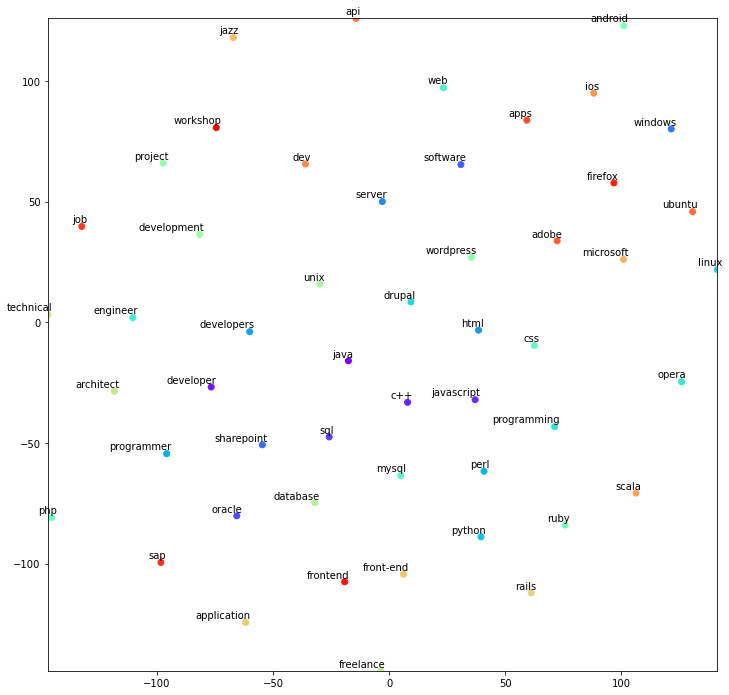

In [56]:
display_closestwords_tsnescatterplot_pre_trained(model_glove_twitter, 'java', 200)

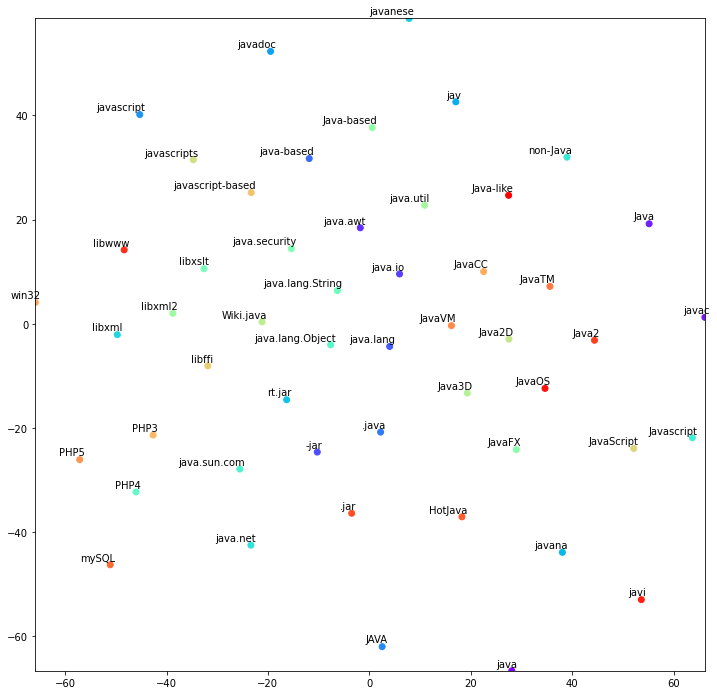

In [60]:
display_closestwords_tsnescatterplot_pre_trained(model_fast_text_wiki, 'java', 300)

In [14]:
display_closestwords_tsnescatterplot(model, 'postgres')

NameError: name 'display_closestwords_tsnescatterplot' is not defined